#**Principle Component Analysis**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

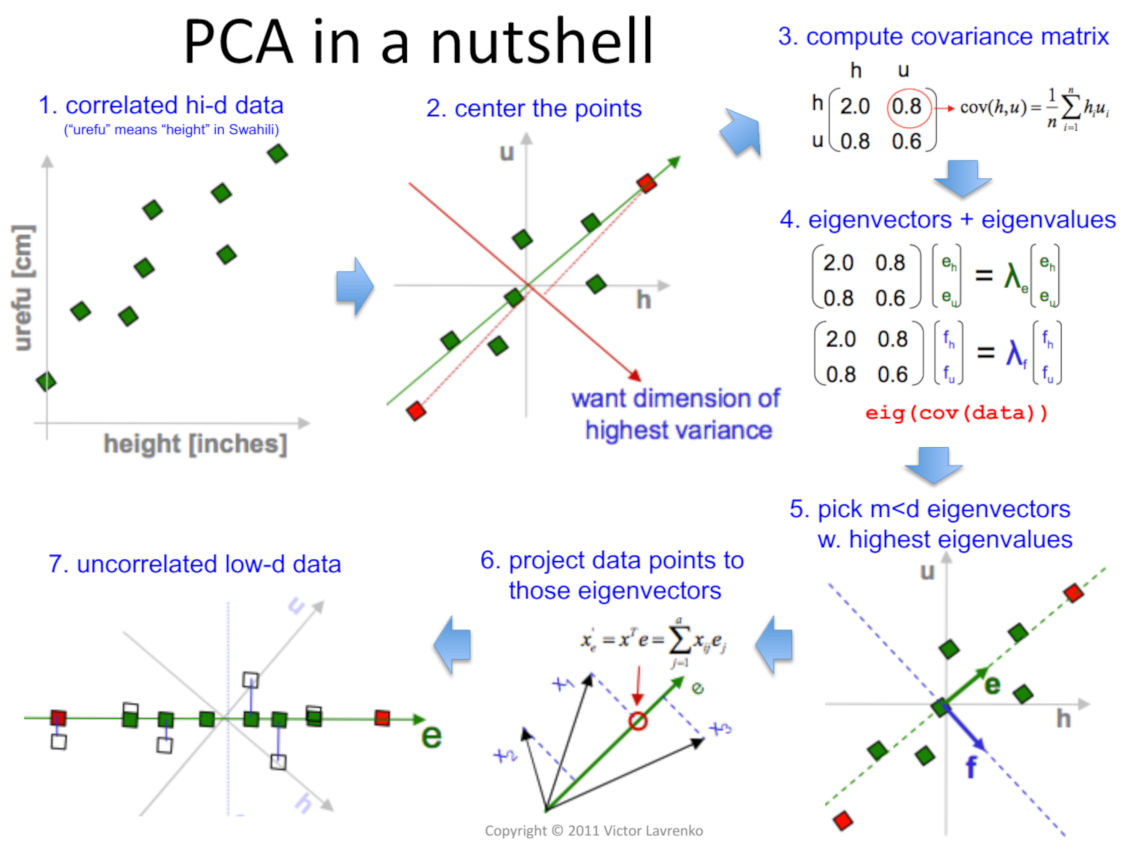

###**STEP 1-Standardization**
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges  which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

***Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.***

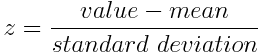

Once the standardization is done, all the variables will be transformed to the same scale.

###**STEP 2-Covariance Matrix**

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix of this from:

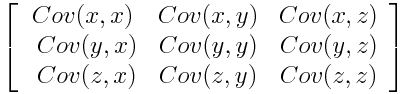

Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

###**STEP 3-EigenValues & EigenVectors**

Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data. Before getting to the explanation of these concepts, let’s first understand what do we mean by principal components.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.

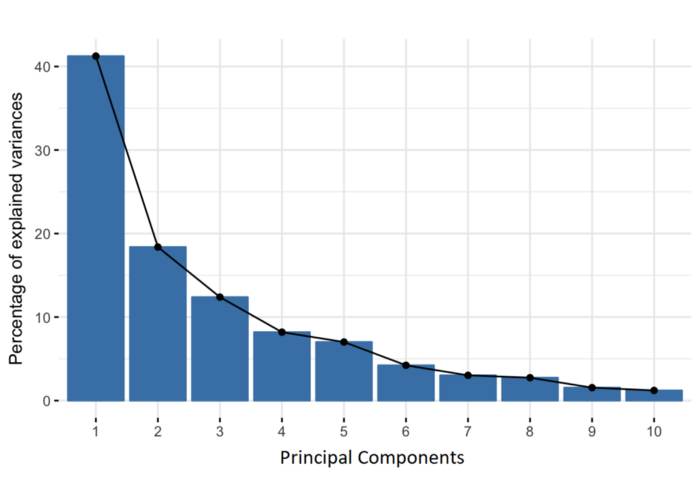

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

###**STEP 4-FeatureVector**

As we saw in the previous step, computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

So, the feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

###**STEP 5-Recast**

In the previous steps, apart from standardization, you do not make any changes on the data, you just select the principal components and form the feature vector, but the input data set remains always in terms of the original axes (i.e, in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.

pca6.png

##**How its Done?**

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component ? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).

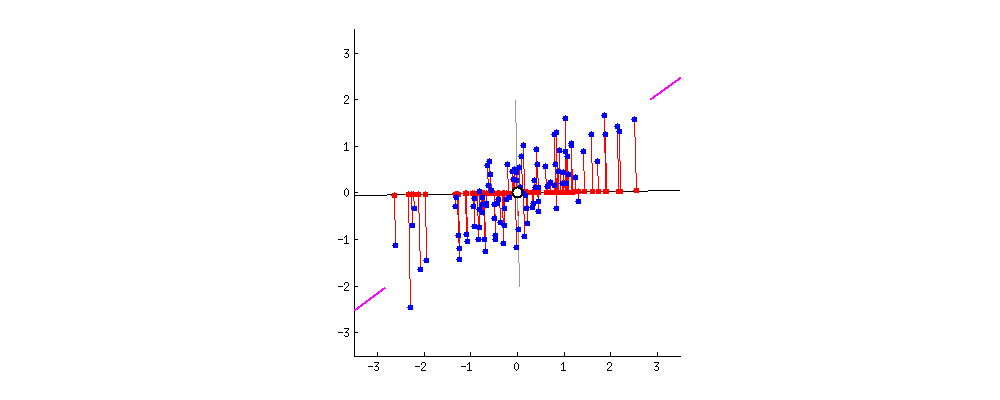

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.

Now that we understood what we mean by principal components, let’s go back to eigenvectors and eigenvalues. What you firstly need to know about them is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

Without further ado, it is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [ ]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [ ]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289]
[6.30061232]


##**KERNEL (KPCA)**

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

There are various kernel methods like linear, polynomial, and gaussian.


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
X, _ = load_digits(return_X_y=True)
transformer = KernelPCA(n_components=7, kernel='linear')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)

##**SPARCE (SparsePCA)**

In sparse PCA one wants to get a small number of features which still capture most of the variance. Thus one needs to enforce sparsity of the PCA component, which yields a trade-off between explained variance and sparsity.

This plays a role for instance in the case of gene expression data where one would like the principal components to consist only of a few significant genes, making it easy to interpret by a human. The right plot shows the variance-cardinality tradeoff curve for three gene expression datasets.

Sparse PCA can be modelled as a nonlinear eigenproblem and efficiently be solved by our nonlinear IPM. An implementation can be downloaded from this website.



In [ ]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA
X, _ = make_friedman1(n_samples=200, n_features=30, random_state=0)
transformer = SparsePCA(n_components=5, random_state=0)
transformer.fit(X)

X_transformed = transformer.transform(X)
X_transformed.shape

# most values in the components_ are zero (sparsity)
np.mean(transformer.components_ == 0)

0.9666666666666667

##**Truncated SVD**

Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that factors a matrix M into the three matrices U, Σ, and V. This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix. Typically, SVD is used under the hood to find the principle components of a matrix.

In [6]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
X = sparse_random(100, 100, density=0.01, format='csr',
                  random_state=42)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum())

print(svd.singular_values_)

[0.0646051  0.06339479 0.06394407 0.05352903 0.04062679]
0.2860997781448586
[1.55360944 1.5121377  1.51052009 1.37056529 1.19917045]


##**Incremental (IPCA)**

We introduce a fast incremental principal component analysis (IPCA) algorithm, called candid covariance-free IPCA (CCIPCA), to compute the principal components of a sequence of samples incrementally without estimating the covariance matrix (thus covariance-free). This new method is for real-time applications where no iterations are allowed and high-dimensional inputs are involved, such as appearance-based image analysis. CCIPCA is motivated by the concept of statistical efficiency (the estimate has the smallest variance given the observed data). The convergence rate of CCIPCA is very high compared with other IPCA algorithms on high-dimensional data, although the highest possible efficiency is not guaranteed because of the unknown sample distribution.

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
X, _ = load_digits(return_X_y=True)
transformer = IncrementalPCA(n_components=7, batch_size=200)
# either partially fit on smaller batches of data
transformer.partial_fit(X[:100, :])

# or let the fit function itself divide the data into batches
X_sparse = sparse.csr_matrix(X)
X_transformed = transformer.fit_transform(X_sparse)
X_transformed.shape


(1797, 7)